<a href="https://colab.research.google.com/github/Antonnn3/WorkBench/blob/main/busana7002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# A/B Test

### Question

The marketing team in your organisation would like to start optimising the website to improve conversion rate. They want your help in designing the first A/B testing experiment.

They want to understand **if** including Sale section at the top of the main menu **would** increase CR compared to BAU (Sale section is at the bottom).

You need to come up with the following:

- Hypothesis (null and alternative)
- Baseline CR value – what is your rationale?
- Expected CR value for the test condition – what is your rationale?
- Sample size – what is your rationale?
- How many days you expect the test will need to be run to achieve the required sample size
- Propose three follow-up experiments ideas

**Background**

> Background
> - CR (Coversion Rate) = Orders / Clicks * 100%
> - Other Measures - see Week6










### Q1 - Hypothesis (null and alternative)

H0 (Null Hypothesis): Including the Sale section at the top of the main menu does not significantly increase the conversion rate compared to keeping it at the bottom (BAU).

H1 (Alternative Hypothesis): Including the Sale section at the top of the main menu significantly increases the conversion rate compared to keeping it at the bottom (BAU).

### Q2 - Baseline CR value – what is your rationale?

,Date,Transactions,Users
0,2021-01-01,38,1616
1,2021-01-02,46,2073
2,2021-01-03,42,1842
3,2021-01-04,33,1831
4,2021-01-05,32,1717


,Date,Transactions,Users,Conversion Rate
0,2021-01-01,38,1616,0.023515
1,2021-01-02,46,2073,0.022190
2,2021-01-03,42,1842,0.022801
3,2021-01-04,33,1831,0.018023
4,2021-01-05,32,1717,0.018637


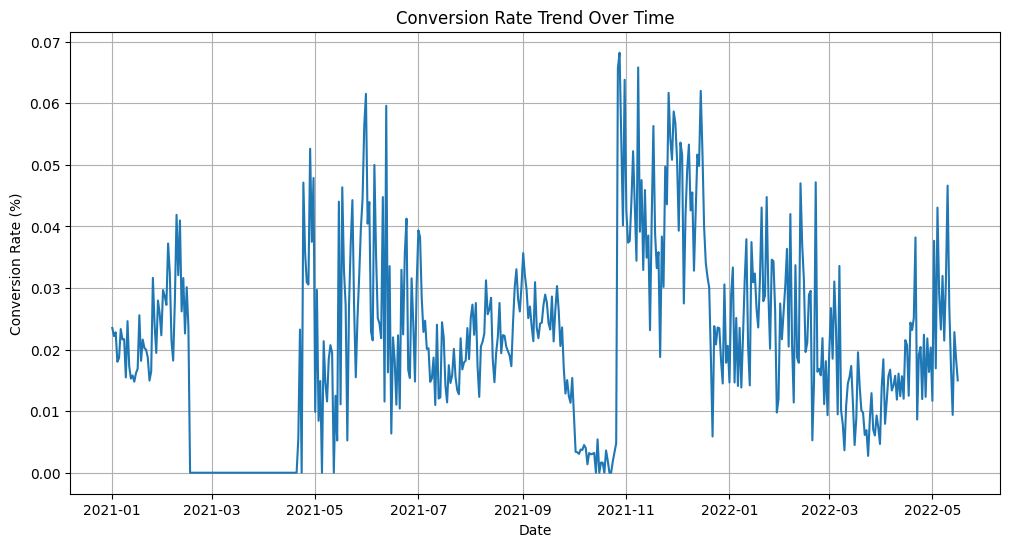

Maximum Date in the dataset: 2022-05-16 00:00:00
Date one year prior to the maximum date: 2021-05-16 00:00:00
Baseline Conversion Rate (Average of past year): 0.0244


In [ ]:
# Step 1: Read data, Calculate CR, and Explore trend
df = pd.read_csv('/content/Sample Online Test 2 dataset - AB Testing.csv')
display(df.head())

# Step 2: Calculate CV = Transactions / Users
df['Conversion Rate'] = (df['Transactions'] / df['Users'])
display(df.head())

# Step 3: Draw Histogram to find out CR trend
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Conversion Rate'])
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate Trend Over Time')
plt.grid(True)
plt.show()
  # Note - CR shows significant seasonality and fluctuation, use longer term average as base

# Calculate Base CR = Average CR in the past year

# Find the maximum date in the dataset
max_date = df['Date'].max()

# Calculate the date one year prior to the maximum date
from dateutil.relativedelta import relativedelta
one_year_ago = max_date - relativedelta(years=1)

print(f"Maximum Date in the dataset: {max_date}")
print(f"Date one year prior to the maximum date: {one_year_ago}")

# Filter the DataFrame for the past year
df_past_year = df[(df['Date'] >= one_year_ago) & (df['Date'] <= max_date)]

# Calculate the average conversion rate for the past year
base_cr = df_past_year['Conversion Rate'].mean()

print(f"Baseline Conversion Rate (Average of past year): {base_cr:.4f}")

Answer: 2.44%
Rationale: The baseline conversion rate is 2.44%. This was calculated as the average conversion rate over the past year. A full year was used to account for significant seasonality and fluctuations observed in the conversion rate trend.

###Q3 - Expected CR value

In [ ]:
# Find mean, standard deviation, max, and min of CR
cr_mean = df['Conversion Rate'].mean()
cr_std = df['Conversion Rate'].std()
cr_max = df['Conversion Rate'].max()
cr_min = df['Conversion Rate'].min()

print(f"Mean Conversion Rate: {cr_mean:.4f}%")
print(f"Standard Deviation of Conversion Rate: {cr_std:.4f}%")
print(f"Maximum Conversion Rate: {cr_max:.4f}%")
print(f"Minimum Conversion Rate: {cr_min:.4f}%")

# Define exp_cr
exp_cr = 0.0344

Mean Conversion Rate: 0.0211%
Standard Deviation of Conversion Rate: 0.0151%
Maximum Conversion Rate: 0.0682%
Minimum Conversion Rate: 0.0000%


Answer: 3.44%
Rationale: The conversion rate shows significant variability, with a mean of 2.11% and standard deviation of 1.51% across past values. This suggests that a larger increase in CR is needed to be significant. However, given the low cost of changing the Sale section's position, a more conservative expected increase of 1% (within one standard deviation) is chosen, resulting in an expected CR of 3.44% (2.44% baseline + 1%).

### Q3 - Sample Size

In [ ]:
from scipy.stats import norm
import numpy as np

p1 = base_cr #2.44%
p2 = exp_cr #3.44%

def ssize_logistic_bin(p1, p2, B=0.5, alpha=0.05, power=0.8):
    z_alpha = norm.ppf(1 - alpha/2.0)
    z_power = norm.ppf(power)
    p = (1 - B) * p1 + B * p2
    term1 = z_alpha * np.sqrt(p * (1 - p) / B)
    term2 = z_power * np.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) * (1 - B) / B)
    n_total = (term1 + term2)**2 / (((p1 - p2)**2) * (1 - B))
    return n_total

N = ssize_logistic_bin(p1, p2, B=0.5, alpha=0.05, power=0.8)
print("Total N:", N)
print("Total N / 2:", N/2)

Total N: 8928.714696359062
Total N / 2: 4464.357348179531


Answer: A total of 8,940 samples (≈4,465 per group) are required. Rational: The calculation assumes α = 0.05 and power = 0.8, providing 95% confidence that the observed difference is statistically significant and 80% confidence that the test can detect the expected 1pp improvement in CR (2.44% to 3.44%).

### Q4 - How many days

In [ ]:
# Calculate average Users in the past year (same interval as calculating average CR)
ave_Users = df_past_year['Users'].mean()
print(f"Average Users (Average of past year): {ave_Users:.4f}")

# Calculate number of days to achive required sample size
days = N/2/ave_Users
print(f"Number of days to achieve required sample size: {days:.4f}")

Average Users (Average of past year): 726.8798
Number of days to achieve required sample size: 6.1418


# Sentiment Analysis

### Question
The Marketing team asked you to help with analysing the Trustpilot reviews of all the companies that pride themselves for being a good value to their customers.

They want to understand how customers rate them, in particular, the following questions are of their interest:

*   What are the top 10 mostly used words in the review texts (excluding the stopwords)? Please provide their names and their respective frequencies. Please share the word cloud featuring these too.
*   What is the sentiment of the Poundshop customers reviews? Please provide the sentiment words count and %, as well as the pie chart visualising the split. Use the Bing dictionary for the purpose.
*   How does the Poundshop customer reviews sentiment compare to Titan Depot:
    *   Which sentiment is more positive? Please provide the % comparisons
    *   What are the key differences between the sentiments of both brands?

###Q1 - top 10 mostly used words and cloud featuring

In [ ]:
# Default Libraries given by the WS11
#!pip install afinn
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Download the necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Adding punkt_tab download

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Read Sample Online Test 2 - Sentiment
df = pd.read_csv('/content/Sentiment/Sample Online Test 2 - Sentiment Analysis.csv')

print(df.head(5))

# Create a df with just the review text
reviews_text = df[['review_text']].rename(columns={'review_text': 'text'})

print(reviews_text.head(5))

        name                 company_url  \
0  Poundshop  https://www.poundshop.com/   
1  Poundshop  https://www.poundshop.com/   
2  Poundshop  https://www.poundshop.com/   
3  Poundshop  https://www.poundshop.com/   
4  Poundshop  https://www.poundshop.com/   

                                         description       author_name  \
0  The home for top brands, amazing value! We hav...             Colin   
1  The home for top brands, amazing value! We hav...  Mr Paul Harrison   
2  The home for top brands, amazing value! We hav...          Mrs Dean   
3  The home for top brands, amazing value! We hav...        Mrs Barlow   
4  The home for top brands, amazing value! We hav...   Graham Bradbury   

                                review_title  \
0                Lowest price in the country   
1  got it on time they took notice that Iâ€¦   
2                          Delivered on time   
3              Quick and efficient service..   
4              Excellent service packed well   

 

         word  freq
2     service    52
4        time    25
5       would    24
6   recommend    23
7       great    23
8   excellent    23
9    delivery    22
10   customer    20
11       good    20
12       well    19


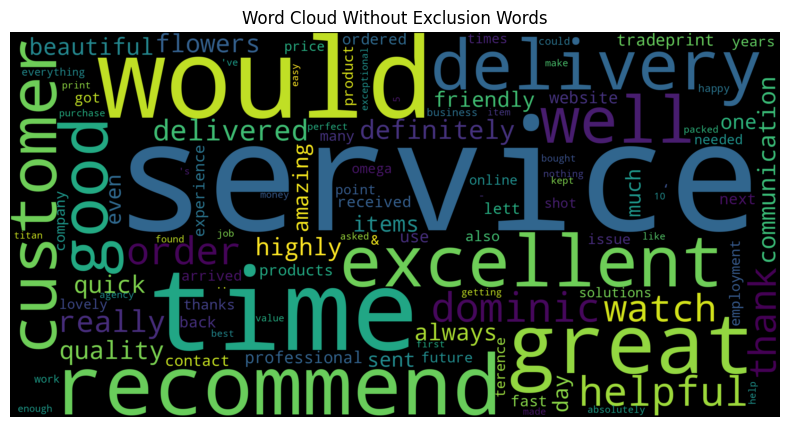

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenize the reviews into individual words using NLTK's word_tokenize
reviews_text['tokens'] = reviews_text['text'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
reviews_text['tokens'] = reviews_text['tokens'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words])

# Flatten the tokenized words into a single list
all_words = [word for tokens in reviews_text['tokens'] for word in tokens]

# Convert the words into a DataFrame to count frequency
word_freq = pd.Series(all_words).value_counts().reset_index()
word_freq.columns = ['word', 'freq']

# Exclude specific words (e.g., brand names)
exclusion_words = ["<", ">",",","'","licorice","n't","!","/","'","(",")","br", "twizzler", "twizzlers", "."]
word_freq_filtered = word_freq[~word_freq['word'].isin(exclusion_words)]

print(word_freq_filtered.head(10))

# Create the second word cloud (excluding specific words)
wordcloud_filtered = WordCloud(width=800, height=400, max_words=200, min_font_size=10, scale=3).generate_from_frequencies(dict(zip(word_freq_filtered['word'], word_freq_filtered['freq'])))

# Plot the second word cloud
plt.figure(figsize=(10, 5))
plt.title("Word Cloud Without Exclusion Words")
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.show()

### Q2 - Sentiment of the Poundshop customers reviews

In [ ]:
companyOfInterest = 'Poundshop'

df_temp = df[df['name'] == companyOfInterest].copy()
display(df_temp.head())

# Create a df with just the review text
reviews_text = df_temp[['review_text']].rename(columns={'review_text': 'text'})

# Split the reviews into individual words and remove stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
reviews_text['tokens'] = reviews_text['text'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])

# Flatten the tokens into a single list of words
all_words = [word for tokens in reviews_text['tokens'] for word in tokens]


,name,company_url,description,author_name,review_title,review_text
0,Poundshop,https://www.poundshop.com/,"The home for top brands, amazing value! We hav...",Colin,Lowest price in the country,Lowest price in the country for what we wanted...
1,Poundshop,https://www.poundshop.com/,"The home for top brands, amazing value! We hav...",Mr Paul Harrison,got it on time they took notice that Iâ€¦,got it on time they took notice that I let the...
2,Poundshop,https://www.poundshop.com/,"The home for top brands, amazing value! We hav...",Mrs Dean,Delivered on time,"Delivered on time. Products as described, pack..."
3,Poundshop,https://www.poundshop.com/,"The home for top brands, amazing value! We hav...",Mrs Barlow,Quick and efficient service..,Quick and efficient service..Pleased
4,Poundshop,https://www.poundshop.com/,"The home for top brands, amazing value! We hav...",Graham Bradbury,Excellent service packed well,Excellent service packed well. Really pleased.


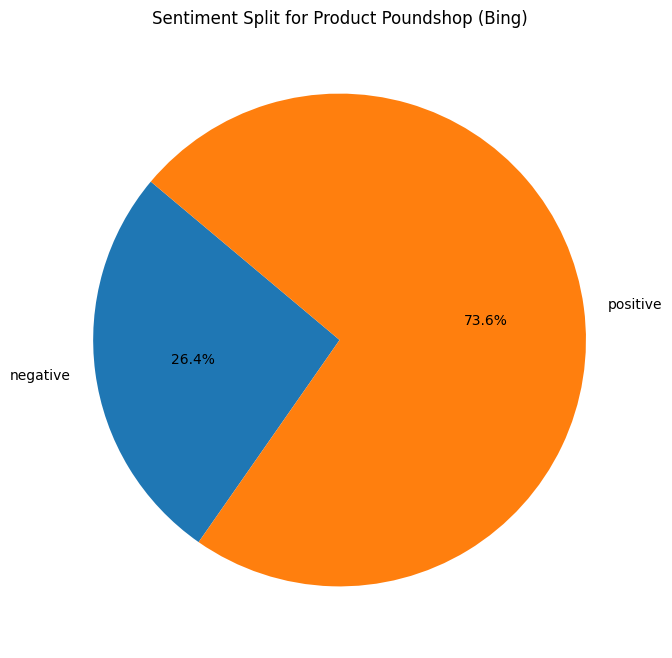

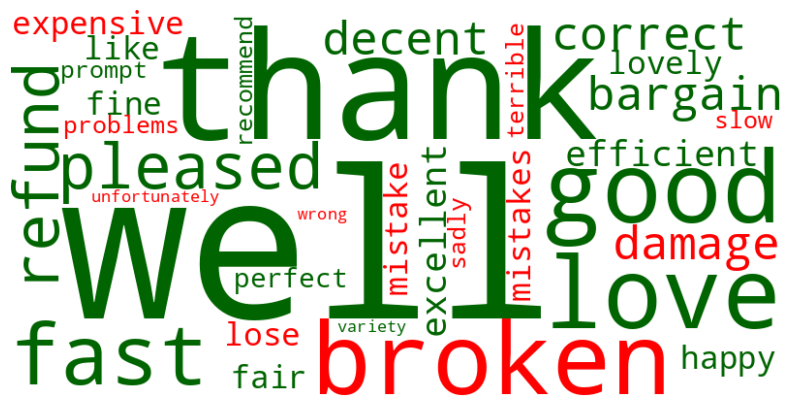

In [ ]:
# Load the Bing sentiment lexicon
bing = pd.read_csv('/content/Sentiment/Bing.csv')

# Create a DataFrame from the list of words
product_and_reviews_text_bing = pd.DataFrame(all_words, columns=['word'])
product_and_reviews_text_bing = product_and_reviews_text_bing.merge(bing, on='word')

# Count sentiment occurrences
pivot_product_and_reviews_text_bing = product_and_reviews_text_bing.groupby(['sentiment']).size().reset_index(name='count')

# For the top product
B003XDH6M6_bing = pivot_product_and_reviews_text_bing
total_words_bing = B003XDH6M6_bing['count'].sum()
B003XDH6M6_bing['percentage'] = round((B003XDH6M6_bing['count'] / total_words_bing) * 100, 2)

# 4. Visualize the sentiment split as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(B003XDH6M6_bing['percentage'], labels=B003XDH6M6_bing['sentiment'], autopct='%1.1f%%', startangle=140)
plt.title(f'Sentiment Split for Product {companyOfInterest} (Bing)')
plt.show()

# 5. Visualize the sentiment as word cloud
# 1) Keep only rows with a sentiment label
df_wc = product_and_reviews_text_bing[product_and_reviews_text_bing['sentiment'].notnull()].copy()

# 2) Aggregate counts per (word, sentiment)
ws = df_wc.groupby(['word', 'sentiment']).size().reset_index(name='count')

# 3) Build total frequency per word for the cloud
freq = ws.groupby('word')['count'].sum().to_dict()  # word -> total count

# 4) Pick a single sentiment per word (majority sentiment)
# ties break to 'positive' (change if you prefer)
major = (ws.sort_values(['word','count','sentiment'])
           .groupby('word')
           .tail(1)  # largest count per word
           .set_index('word')['sentiment']
           .to_dict())

# 5) WordCloud: fix randomness for reproducibility
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

wc = WordCloud(width=800, height=400, background_color='white',
               random_state=123)  # <- reproducible layout

# 6) Custom colour function based on majority sentiment
def sentiment_color_func(word, font_size, position, orientation, font_path, random_state):
    s = major.get(word, 'neutral')
    if s == 'positive':
        return "darkgreen"
    elif s == 'negative':
        return "red"
    else:
        return "gray"

# 7) Generate and colour
wordcloud = wc.generate_from_frequencies(freq)
wordcloud.recolor(color_func=sentiment_color_func, random_state=42)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Q3 - Poundshop vs Titan Depot


In [ ]:
companyOfInterest = 'Titan Depot'

df_temp = df[df['name'] == companyOfInterest].copy()
display(df_temp.head())

# Create a df with just the review text
reviews_text = df_temp[['review_text']].rename(columns={'review_text': 'text'})

# Split the reviews into individual words and remove stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
reviews_text['tokens'] = reviews_text['text'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])

# Flatten the tokens into a single list of words
all_words = [word for tokens in reviews_text['tokens'] for word in tokens]


,name,company_url,description,author_name,review_title,review_text
40,Titan Depot,http://titandepot.co.uk,Our products have been selected by our experts...,Ryan,No reply on emails about returning the product...,I needed to swap the long sleeve anti slash t-...
41,Titan Depot,http://titandepot.co.uk,Our products have been selected by our experts...,Mr Vasey,Good at what they do,Like many others out there i have been watchin...
42,Titan Depot,http://titandepot.co.uk,Our products have been selected by our experts...,Ella Stone,Dean A1** chap!,Nothing but good words here. Dean at Titan has...
43,Titan Depot,http://titandepot.co.uk,Our products have been selected by our experts...,Cam,Excellent customer service,"Excellent customer service, very friendly and ..."
44,Titan Depot,http://titandepot.co.uk,Our products have been selected by our experts...,Janet,Don't trust him,ordered gloves which arrived but did not fit. ...


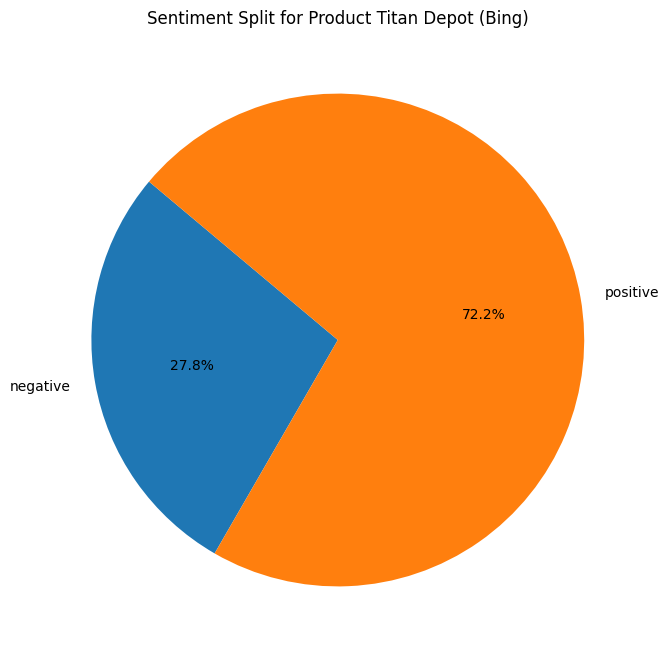

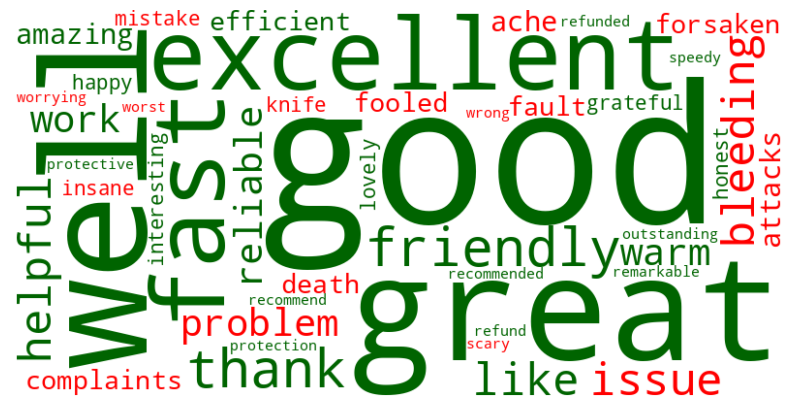

In [ ]:
# Create a DataFrame from the list of words
product_and_reviews_text_bing = pd.DataFrame(all_words, columns=['word'])
product_and_reviews_text_bing = product_and_reviews_text_bing.merge(bing, on='word')

# Count sentiment occurrences
pivot_product_and_reviews_text_bing = product_and_reviews_text_bing.groupby(['sentiment']).size().reset_index(name='count')

# For the top product
B003XDH6M6_bing = pivot_product_and_reviews_text_bing
total_words_bing = B003XDH6M6_bing['count'].sum()
B003XDH6M6_bing['percentage'] = round((B003XDH6M6_bing['count'] / total_words_bing) * 100, 2)

# 4. Visualize the sentiment split as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(B003XDH6M6_bing['percentage'], labels=B003XDH6M6_bing['sentiment'], autopct='%1.1f%%', startangle=140)
plt.title(f'Sentiment Split for Product {companyOfInterest} (Bing)')
plt.show()

# 5. Visualize the sentiment as word cloud
# 1) Keep only rows with a sentiment label
df_wc = product_and_reviews_text_bing[product_and_reviews_text_bing['sentiment'].notnull()].copy()

# 2) Aggregate counts per (word, sentiment)
ws = df_wc.groupby(['word', 'sentiment']).size().reset_index(name='count')

# 3) Build total frequency per word for the cloud
freq = ws.groupby('word')['count'].sum().to_dict()  # word -> total count

# 4) Pick a single sentiment per word (majority sentiment)
# ties break to 'positive' (change if you prefer)
major = (ws.sort_values(['word','count','sentiment'])
           .groupby('word')
           .tail(1)  # largest count per word
           .set_index('word')['sentiment']
           .to_dict())

# 5) WordCloud: fix randomness for reproducibility
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

wc = WordCloud(width=800, height=400, background_color='white',
               random_state=123)  # <- reproducible layout

# 6) Custom colour function based on majority sentiment
def sentiment_color_func(word, font_size, position, orientation, font_path, random_state):
    s = major.get(word, 'neutral')
    if s == 'positive':
        return "darkgreen"
    elif s == 'negative':
        return "red"
    else:
        return "gray"

# 7) Generate and colour
wordcloud = wc.generate_from_frequencies(freq)
wordcloud.recolor(color_func=sentiment_color_func, random_state=42)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()